1.	Calculate the correlation between the similarity matrix (from Problem 3) and the clusters found.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples

In [2]:
VectorX = [0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
VectorY = [.1, .41, .55, .35, .64, .47, .98, .44, .85, .76]

In [3]:
np.corrcoef(VectorX, VectorY)

array([[1.        , 0.66256593],
       [0.66256593, 1.        ]])

The Correlation Coeffificent is .66

Let us revisit the UCI Wine dataset from Assignment 2. a. For values of k from 1 to 10, do K-means clustering on the data points (leaving out the class label attribute) using Euclidean distance, and plot SSE as a function of K. b. Repeat the experiment above after normalizing the data points as a preprocessing step. c. Your SSE plot hopefully has an “elbow” at K = 3. What is the centroid and size of each cluster for K = 3 ? d. Since you know the true labels of the data points, use the true labels to compute the validity of your final clustering using an Entropy as an external measure.

In [4]:
#Import DF
Wine_DF = pd.read_csv('wine.data.csv', sep = ',')

In [5]:
Wine_DF.head()

,Class Identifier,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanod phenols,Proanthecyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


a. For values of k from 1 to 10, do K-means clustering on the data points (leaving out the class label attribute) using Euclidean distance, and plot SSE as a function of K.

In [6]:
#Source https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
#Kmeans from Sklearn automatically uses euclidean distance
#'The proper value to use for the basic elbow appraoch is inertia, which is the sum of squares'
#Source https://datascience.stackexchange.com/questions/32221/whats-the-difference-between-finding-the-average-euclidean-distance-and-using-i
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

X = Wine_DF.loc[:, Wine_DF.columns !='Class Identifier'].copy()
inertias = [] 
K = range(1,11) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    inertias.append(kmeanModel.inertia_) 

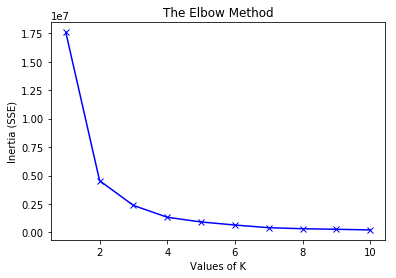

In [7]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia (SSE)') 
plt.title('The Elbow Method') 
plt.show() 

b. Repeat the experiment above after normalizing the data points as a preprocessing step.

In [8]:
from sklearn import preprocessing
#Source https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_Normalized = pd.DataFrame(x_scaled)

C:\Users\eszarek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
#Above error is fine, it just tranformed our Dtypes to floats
X_Normalized.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [10]:
X_Normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [11]:
inertias = [] 
K = range(1,11) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_Normalized) 
    kmeanModel.fit(X_Normalized)     
       
    inertias.append(kmeanModel.inertia_) 

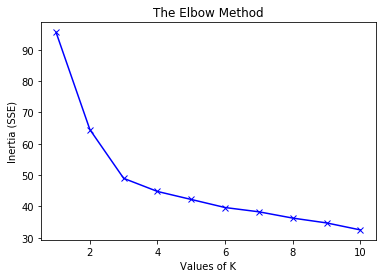

In [12]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia (SSE)') 
plt.title('The Elbow Method') 
plt.show() 

c. Your SSE plot hopefully has an “elbow” at K = 3. What is the centroid and size of each cluster for K = 3 ?

In [13]:
#Source https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
Centroids = kmeanModel.cluster_centers_

In [14]:
#Coordinates of cluster centers for when K=3
Centroids[2]

array([0.34473684, 0.58173348, 0.54201681, 0.53939617, 0.2802795 ,
       0.5679803 , 0.48613623, 0.40431267, 0.50878774, 0.16089712,
       0.35133566, 0.69204605, 0.19467088])

Since you know the true labels of the data points, use the true labels to compute the validity of your final clustering using an Entropy as an external measure.

In [15]:
labels = kmeanModel.predict(X_Normalized) 

In [16]:
from scipy.stats import entropy

In [17]:
y = Wine_DF['Class Identifier']

In [18]:
Actual_labels = np.asarray(y)

In [19]:
entropy(labels, Actual_labels)

0.3319953819569237

Due to the relativly low entropy we can assume that there is low variance between the two and that validity can be trusted.